# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее', 'Среднее специальное', 'Неоконченное высшее', 'Высшее', 'Ученая степень', 'Два и более высших образования', 'Неполное среднее'}


MARITAL_STATUS
{'Вдовец/Вдова', 'Разведен(а)', 'Гражданский брак', 'Состою в браке', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Сельское хозяйство', 'Информационные услуги', 'Энергетика', 'Недвижимость', 'Наука', 'Торговля', 'ЧОП/Детективная д-ть', 'СМИ/Реклама/PR-агенства', 'Строительство', 'Развлечения/Искусство', 'Химия/Парфюмерия/Фармацевтика', 'Логистика', 'Информационные технологии', 'Управляющая компания', 'Государственная служба', 'Салоны красоты и здоровья', 'Туризм', 'Страхование', 'Нефтегазовая промышленность', 'Транспорт', 'Металлургия/Промышленность/Машиностроение', 'Другие сферы', 'Здравоохранение', 'Образование', 'Коммунальное хоз-во/Дорожные службы', 'Банк/Финансы', 'Маркетинг', 'Подбор персонала', 'Юридические услуги/нотариальные услуги', 'Ресторанный бизнес/Общественное питание', 'Сборочные производства'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [15]:
# в данных присутствуют пропуски 
# WORK_TIME - попробуем заполнить пропуски средним значением/медианой
# PREVIOUS_CARD_NUM_UTILIZE - пропущенные значения заменим нулями исходя из описания данного поля датасета
# пропуски в текстовых (категориальных) данных заменим пустотами ('')

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [16]:
# в данных есть текстовые поля, которые можно рассматирвать как категориальные признаки:
# 'EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'PERSONAL_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM'
# пропуски в категориальных признаках запоплним пустотами ('')
# для того чтобы использовать эти признаки в моделях - перекодируем их dummy-переменные

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [17]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    ## Your Code Here
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    df_output['WORK_TIME'] = df_output['WORK_TIME'].fillna(df_output['WORK_TIME'].mean())
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)
    
    df_output = df_output.fillna('')
    
    for col in df_output.loc[:, 'EDUCATION':'REGION_NM']:
        df_output[col] = pd.factorize(df_output[col])[0]
        
    df_output = pd.get_dummies(df_output, prefix=['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'PERSONAL_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM'],
                                   columns=['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'PERSONAL_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM'])
    
    return df_output


In [18]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [19]:
from sklearn.model_selection import train_test_split

#### Задание 5. Обучение и оценка качества разных моделей

In [20]:
# from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X, X_test, y, y_test = train_test_split(df_train_preproc.iloc[:, 1:], df_train_preproc.iloc[:, 0], test_size=0.3, random_state=42)

In [21]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)

model_names = ['DecisionTree','RandomForest','LogisticReg']
models = [dt, rf, lr]
pred = list()
pred_proba= list()

def trainModels(models, X, y, X_test, pred, pred_proba):
    for m in models:
        m.fit(X,y)
        pred.append(m.predict(X_test))
        pred_proba.append(m.predict_proba(X_test))

trainModels(models, X, y, X_test, pred, pred_proba)

In [22]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
acc_scores = list()
prec_scores = list()
rec_scores = list() 

def getScores(models, y_test, pred, acc_scores, prec_scores, rec_scores):
    for i in range(0, len(models)):
        acc_scores.append(accuracy_score(y_test, pred[i]))
        prec_scores.append(precision_score(y_test, pred[i]))
        rec_scores.append(recall_score(y_test, pred[i]))
        
getScores(models, y_test, pred, acc_scores, prec_scores, rec_scores)

def printScores(model_names, scores, score_name):
    print(score_name, ':')
    for m, s in zip(model_names, scores):
        print(m,':',s)
    print('\n')

printScores(model_names, acc_scores, 'Accuracy')
printScores(model_names, prec_scores, 'Precision')
printScores(model_names, rec_scores, 'Recall')

Accuracy :
DecisionTree : 0.7880446682723888
RandomForest : 0.8776001751696957
LogisticReg : 0.8780380994088023


Precision :
DecisionTree : 0.13961605584642234
RandomForest : 0.35714285714285715
LogisticReg : 0.25


Recall :
DecisionTree : 0.14414414414414414
RandomForest : 0.009009009009009009
LogisticReg : 0.0018018018018018018




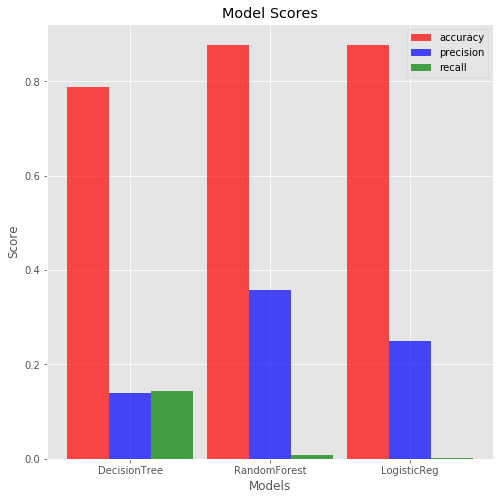

In [23]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here
index = np.arange(len(model_names))
bar_width = 0.3
alpha = 0.7

plt.figure(figsize=(8, 8))

plt.bar(index, acc_scores, width=bar_width, alpha=alpha, color='r', label='accuracy')
plt.bar(index+1.0*bar_width, prec_scores,  width=bar_width, alpha=alpha, color='b', label='precision')
plt.bar(index+2.0*bar_width, rec_scores,  width=bar_width, alpha=alpha, color='g', label='recall')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Scores')
plt.xticks(index+1.0*bar_width, model_names)
plt.legend()


ROC AUC :
DecisionTree : 0.5106313941059704
RandomForest : 0.5871617130590212
LogisticReg : 0.6457371129853682




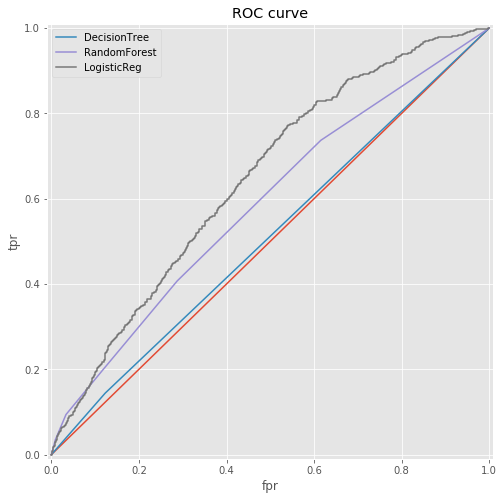

In [24]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here
from sklearn.metrics import roc_curve, roc_auc_score

roc_auc_scores = list()

def getROCAUC(models, y_test, pred_proba, roc_auc_scores):
    for i in range(0, len(models)):
        roc_auc_scores.append(roc_auc_score(y_test, pred_proba[i][:,1]))

getROCAUC(models, y_test, pred_proba, roc_auc_scores)
        
printScores(model_names, roc_auc_scores, 'ROC AUC')

plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
for i in range(0, len(models)):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[i][:,1])      
    plt.plot(fpr, tpr, label=model_names[i])
plt.legend()

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

## Your Code Here
cv_scores = list()

def getCVScrores(models, X, y, cv): 
    for i in range(0, len(models)):
        scores = cross_val_score(
            models[i],
            X,
            y,
            scoring='roc_auc',
            cv=cv
        )
        cv_scores.append(scores.mean())
        
getCVScrores(models, X, y, cv)

printScores(model_names, cv_scores, 'Cross Val Score')


Cross Val Score :
DecisionTree : 0.5225286480368323
RandomForest : 0.5698915846580629
LogisticReg : 0.6293174102307636




In [26]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here
# по результатм показателя ROC AUC и CV лучшая модель - логистическая регрессия
# предскажем вероятности с помощью данной модели на отложенной test выборке
pred_proba_test = lr.predict_proba(df_test_preproc.iloc[:, 1:])

In [27]:
# Померить roc_auc на тесте
print('ROC AUC on test sampe', ':')
print('LogisticReg ', ':', roc_auc_score(df_test_preproc.iloc[:, 0], pred_proba_test[:,1]))

ROC AUC on test sampe :
LogisticReg  : 0.6251264003473731


In [28]:
# при использованиие модели логистической регресии ROC AUC на отложенной выборке составил: 0.6251264003473731
# roc_auc_score(df_test_preproc.iloc[:, 0], pred_proba_test[:,1])